# Spectral denoising as feature engineering

In this notebook we investigate the use of Fourier and Wavelet tranforms as a denosing pre-processing step prior to time series forecasting. This approach can be summarised as:
- step 1: Spectral tranforms of time series data, a transform from the time to frequency domain
- step 2: filter out high frequency noise components.
- step 3: inverses tranforms the frequency signal back to the time domain.
- step 4: forecasting the denoised signal. 

In [1]:
# import my bespoke modules
from one_dimensional_time_series_forecasting import time_series_prediction, hit_rate, invert_first_difference,invert_first_difference_2,invert_scaling, invert_first_difference_with_log_2
from spectral_denoising import automatic_fourier_denoising, automatic_fourier_denoising_wf

# model evalution metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

# data preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

# interactive figures
%matplotlib widget 

# general data wrangling and visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tabulate import tabulate



2022-05-13 11:05:07.098363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-13 11:05:07.098397: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# 1. Fourier methods

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-22,95.199997,96.889999,95.120003,96.730003,96.730003,252349
1,2014-01-23,96.690002,97.839996,96.410004,97.320000,97.320000,274078
2,2014-01-24,97.370003,97.800003,96.250000,96.639999,96.639999,239673
3,2014-01-27,96.900002,97.180000,95.209999,95.720001,95.720001,235110
4,2014-01-28,95.660004,97.660004,95.629997,97.410004,97.410004,206490
...,...,...,...,...,...,...,...
1995,2021-12-23,73.029999,73.949997,72.269997,73.790001,73.790001,270223
1996,2021-12-27,73.379997,76.089996,72.570000,75.570000,75.570000,268490
1997,2021-12-28,75.970001,76.919998,75.529999,75.980003,75.980003,249728
1998,2021-12-29,76.040001,77.370003,75.360001,76.559998,76.559998,283557


Threshold found! Threshold: 0.09516725704532791 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


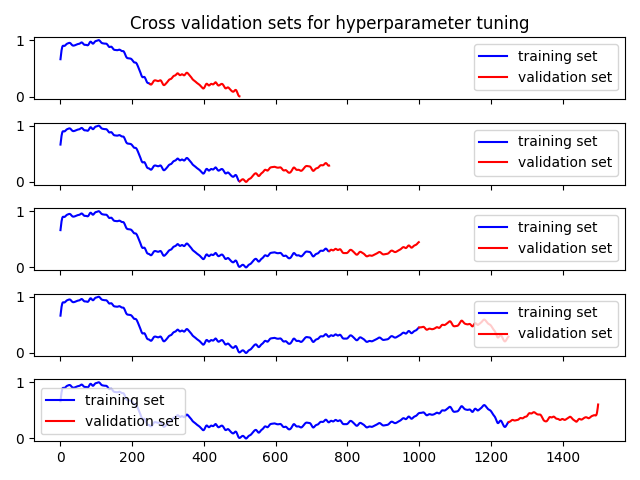

Training multivariate linear regression:

Linear regression coefficients: 
 [  -0.97299275    9.1629817   -39.37869057  101.69557009 -174.76491196
  208.82508571 -175.70436117  102.79474417  -40.02169258    9.36426733]
MAPE: 35.02678726079589
RMSE:  4.840802058097271
MAE:  2.9132137625871137

Training support vector machine:
Model params:  {'C': 0.1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 5000, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MAPE: 0.3862396770419908
RMSE:  0.04739290376068094
MAE:  0.03389030859686056

Training MLP neural network: 
Model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 100, 'nesterovs_momentum': True, 'power_t': 0.

/home/tristan/repos/tristan_meng_data_science/spectral_denoising.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,2,figsize=(10,5))
/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 1
Threshold found! Threshold: 0.007821988342696054 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 2
Threshold found! Threshold: 0.0075265897742566226 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 3
Threshold found! Threshold: 0.006214458376883567 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 4
Threshold found! Threshold: 0.007641804406026162 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 5
Threshold found! Threshold: 0.006045603724856322 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 6
Threshold found! Threshold: 0.005622502958767227 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 7
Threshold found! Threshold: 0.004613225415168848 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 8
Threshold found! Threshold: 0.0051296924076507985 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 9
Threshold found! Threshold: 0.0017840875547092748 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 10
Threshold found! Threshold: 0.000770582450269583 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 11
Threshold found! Threshold: 0.0036592015566873507 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 12
Threshold found! Threshold: 0.0026584916649437284 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 13
Threshold found! Threshold: 0.004891901190585199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 14
Threshold found! Threshold: 0.0018531444400409832 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 15
Threshold found! Threshold: 0.00014310280015153933 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 16
Threshold found! Threshold: 0.0004899198531655164 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 17
Threshold found! Threshold: 0.00025176022565435676 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 18
Threshold found! Threshold: 0.0005828377506573654 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 19
Threshold found! Threshold: 0.0012803736539360208 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 20
Threshold found! Threshold: 0.003147416841721983 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 21
Threshold found! Threshold: 0.0025454133134183215 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 22
Threshold found! Threshold: 0.002027753153069664 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 23
Threshold found! Threshold: 0.0004871831732180319 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 24
Threshold found! Threshold: 0.00024495917920518525 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 25
Threshold found! Threshold: 0.00013970615322258668 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 26
Threshold found! Threshold: 0.00019827380245796006 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 27
Threshold found! Threshold: 0.00023057400982769757 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 28
Threshold found! Threshold: 0.0006833940868356376 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 29
Threshold found! Threshold: 0.0003930410297204524 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 30
Threshold found! Threshold: 0.0007557156983527014 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 31
Threshold found! Threshold: 0.001845038797795547 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 32
Threshold found! Threshold: 0.0018321261724528895 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 33
Threshold found! Threshold: 0.002544873820785142 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 34
Threshold found! Threshold: 0.0035892046695639333 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 35
Threshold found! Threshold: 0.0038476145055848375 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 36
Threshold found! Threshold: 0.004279094437772716 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 37
Threshold found! Threshold: 0.0021924890261507705 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 38
Threshold found! Threshold: 0.003311105994817963 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 39
Threshold found! Threshold: 0.0012447679451038029 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 40
Threshold found! Threshold: 0.0017279828243208393 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 41
Threshold found! Threshold: 0.0017247201116098816 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 42
Threshold found! Threshold: 0.0010016502632762807 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 43
Threshold found! Threshold: 0.0012146942013091199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 44
Threshold found! Threshold: 0.0001825290703811257 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 45
Threshold found! Threshold: 0.0033385497510640023 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 46
Threshold found! Threshold: 0.001455864024053143 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 47
Threshold found! Threshold: 0.0028459262237156904 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 48
Threshold found! Threshold: 0.001848748077906362 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 49
Threshold found! Threshold: 0.00044900173466914115 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 50
Threshold found! Threshold: 0.0007685322744342166 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 51
Threshold found! Threshold: 0.0020054400887909293 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 52
Threshold found! Threshold: 0.0017259136971336081 Test: 98.01980198019803


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 53
Threshold found! Threshold: 0.0028616899917867215 Test: 99.00990099009901


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 54
Threshold found! Threshold: 0.007213452597475874 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 55
Threshold found! Threshold: 0.008485122791697209 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 56
Threshold found! Threshold: 0.0076009125651860954 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 57
Threshold found! Threshold: 0.006759346296818936 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 58
Threshold found! Threshold: 0.006817557228097913 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 59
Threshold found! Threshold: 0.007431522949860028 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 60
Threshold found! Threshold: 0.006223513301271392 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 61
Threshold found! Threshold: 0.00434969894994898 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 62
Threshold found! Threshold: 0.005635037138502281 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 63
Threshold found! Threshold: 0.0044045840526152815 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 64
Threshold found! Threshold: 0.004948689865555444 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 65
Threshold found! Threshold: 0.008118609411464424 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 66
Threshold found! Threshold: 0.007069018802306648 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 67
Threshold found! Threshold: 0.006193361027059522 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 68
Threshold found! Threshold: 0.006670906031930461 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 69
Threshold found! Threshold: 0.005495743553188254 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 70
Threshold found! Threshold: 0.0046184354030865534 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
len pred:  1775
len history:  1775
len dates:  1775
Movement prediction accuracy: 99.83 %
Confusion matrix:
[[830   3]
 [  0 942]]
MAPE: 0.00050805266099951
RMSE:  0.00036233008799444
MAE:  5.312364890504538e-05
Directional Accuracy:  0.9983098591549295


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Taking 71 walks during walk forward validation
walk 0
Threshold found! Threshold: 0.00213100762705651 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 1
Threshold found! Threshold: 0.007821988342696054 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 2
Threshold found! Threshold: 0.0075265897742566226 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 3
Threshold found! Threshold: 0.006214458376883567 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 4
Threshold found! Threshold: 0.007641804406026162 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 5
Threshold found! Threshold: 0.006045603724856322 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 6
Threshold found! Threshold: 0.005622502958767227 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 7
Threshold found! Threshold: 0.004613225415168848 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 8
Threshold found! Threshold: 0.0051296924076507985 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 9
Threshold found! Threshold: 0.0017840875547092748 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 10
Threshold found! Threshold: 0.000770582450269583 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 11
Threshold found! Threshold: 0.0036592015566873507 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 12
Threshold found! Threshold: 0.0026584916649437284 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 13
Threshold found! Threshold: 0.004891901190585199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 14
Threshold found! Threshold: 0.0018531444400409832 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 15
Threshold found! Threshold: 0.00014310280015153933 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 16
Threshold found! Threshold: 0.0004899198531655164 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 17
Threshold found! Threshold: 0.00025176022565435676 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 18
Threshold found! Threshold: 0.0005828377506573654 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 19
Threshold found! Threshold: 0.0012803736539360208 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 20
Threshold found! Threshold: 0.003147416841721983 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 21
Threshold found! Threshold: 0.0025454133134183215 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 22
Threshold found! Threshold: 0.002027753153069664 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 23
Threshold found! Threshold: 0.0004871831732180319 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 24
Threshold found! Threshold: 0.00024495917920518525 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 25
Threshold found! Threshold: 0.00013970615322258668 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 26
Threshold found! Threshold: 0.00019827380245796006 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 27
Threshold found! Threshold: 0.00023057400982769757 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 28
Threshold found! Threshold: 0.0006833940868356376 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 29
Threshold found! Threshold: 0.0003930410297204524 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 30
Threshold found! Threshold: 0.0007557156983527014 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 31
Threshold found! Threshold: 0.001845038797795547 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 32
Threshold found! Threshold: 0.0018321261724528895 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 33
Threshold found! Threshold: 0.002544873820785142 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 34
Threshold found! Threshold: 0.0035892046695639333 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 35
Threshold found! Threshold: 0.0038476145055848375 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 36
Threshold found! Threshold: 0.004279094437772716 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 37
Threshold found! Threshold: 0.0021924890261507705 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 38
Threshold found! Threshold: 0.003311105994817963 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 39
Threshold found! Threshold: 0.0012447679451038029 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 40
Threshold found! Threshold: 0.0017279828243208393 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 41
Threshold found! Threshold: 0.0017247201116098816 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 42
Threshold found! Threshold: 0.0010016502632762807 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 43
Threshold found! Threshold: 0.0012146942013091199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 44
Threshold found! Threshold: 0.0001825290703811257 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 45
Threshold found! Threshold: 0.0033385497510640023 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 46
Threshold found! Threshold: 0.001455864024053143 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 47
Threshold found! Threshold: 0.0028459262237156904 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 48
Threshold found! Threshold: 0.001848748077906362 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 49
Threshold found! Threshold: 0.00044900173466914115 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 50
Threshold found! Threshold: 0.0007685322744342166 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 51
Threshold found! Threshold: 0.0020054400887909293 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 52
Threshold found! Threshold: 0.0017259136971336081 Test: 98.01980198019803


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 53
Threshold found! Threshold: 0.0028616899917867215 Test: 99.00990099009901


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 54
Threshold found! Threshold: 0.007213452597475874 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 55
Threshold found! Threshold: 0.008485122791697209 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 56
Threshold found! Threshold: 0.0076009125651860954 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 57
Threshold found! Threshold: 0.006759346296818936 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 58
Threshold found! Threshold: 0.006817557228097913 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 59
Threshold found! Threshold: 0.007431522949860028 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 60
Threshold found! Threshold: 0.006223513301271392 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 61
Threshold found! Threshold: 0.00434969894994898 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 62
Threshold found! Threshold: 0.005635037138502281 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 63
Threshold found! Threshold: 0.0044045840526152815 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 64
Threshold found! Threshold: 0.004948689865555444 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 65
Threshold found! Threshold: 0.008118609411464424 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 66
Threshold found! Threshold: 0.007069018802306648 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 67
Threshold found! Threshold: 0.006193361027059522 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 68
Threshold found! Threshold: 0.006670906031930461 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 69
Threshold found! Threshold: 0.005495743553188254 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 70
Threshold found! Threshold: 0.0046184354030865534 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
len pred:  1775
len history:  1775
len dates:  1775
Movement prediction accuracy: 57.41 %
Confusion matrix:
[[660 173]
 [583 359]]
MAPE: 1.039807689378798
RMSE:  0.18526976059344744
MAE:  0.15335523727729428
Directional Accuracy:  0.5740845070422536


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Taking 71 walks during walk forward validation
walk 0
Threshold found! Threshold: 0.00213100762705651 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 1
Threshold found! Threshold: 0.007821988342696054 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 2
Threshold found! Threshold: 0.0075265897742566226 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 3
Threshold found! Threshold: 0.006214458376883567 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 4
Threshold found! Threshold: 0.007641804406026162 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 5
Threshold found! Threshold: 0.006045603724856322 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 6
Threshold found! Threshold: 0.005622502958767227 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 7
Threshold found! Threshold: 0.004613225415168848 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 8
Threshold found! Threshold: 0.0051296924076507985 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 9
Threshold found! Threshold: 0.0017840875547092748 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 10
Threshold found! Threshold: 0.000770582450269583 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 11
Threshold found! Threshold: 0.0036592015566873507 Test: 96.03960396039604
walk 12
Threshold found! Threshold: 0.0026584916649437284 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 13
Threshold found! Threshold: 0.004891901190585199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 14
Threshold found! Threshold: 0.0018531444400409832 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 15
Threshold found! Threshold: 0.00014310280015153933 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 16
Threshold found! Threshold: 0.0004899198531655164 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 17
Threshold found! Threshold: 0.00025176022565435676 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 18
Threshold found! Threshold: 0.0005828377506573654 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 19
Threshold found! Threshold: 0.0012803736539360208 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 20
Threshold found! Threshold: 0.003147416841721983 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 21
Threshold found! Threshold: 0.0025454133134183215 Test: 97.02970297029702
walk 22
Threshold found! Threshold: 0.002027753153069664 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 23
Threshold found! Threshold: 0.0004871831732180319 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 24
Threshold found! Threshold: 0.00024495917920518525 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 25
Threshold found! Threshold: 0.00013970615322258668 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 26
Threshold found! Threshold: 0.00019827380245796006 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 27
Threshold found! Threshold: 0.00023057400982769757 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 28
Threshold found! Threshold: 0.0006833940868356376 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 29
Threshold found! Threshold: 0.0003930410297204524 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 30
Threshold found! Threshold: 0.0007557156983527014 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 31
Threshold found! Threshold: 0.001845038797795547 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 32
Threshold found! Threshold: 0.0018321261724528895 Test: 97.02970297029702
walk 33
Threshold found! Threshold: 0.002544873820785142 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 34
Threshold found! Threshold: 0.0035892046695639333 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 35
Threshold found! Threshold: 0.0038476145055848375 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 36
Threshold found! Threshold: 0.004279094437772716 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 37
Threshold found! Threshold: 0.0021924890261507705 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 38
Threshold found! Threshold: 0.003311105994817963 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 39
Threshold found! Threshold: 0.0012447679451038029 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 40
Threshold found! Threshold: 0.0017279828243208393 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 41
Threshold found! Threshold: 0.0017247201116098816 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 42
Threshold found! Threshold: 0.0010016502632762807 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 43
Threshold found! Threshold: 0.0012146942013091199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 44
Threshold found! Threshold: 0.0001825290703811257 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 45
Threshold found! Threshold: 0.0033385497510640023 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 46
Threshold found! Threshold: 0.001455864024053143 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 47
Threshold found! Threshold: 0.0028459262237156904 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 48
Threshold found! Threshold: 0.001848748077906362 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 49
Threshold found! Threshold: 0.00044900173466914115 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 50
Threshold found! Threshold: 0.0007685322744342166 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 51
Threshold found! Threshold: 0.0020054400887909293 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 52
Threshold found! Threshold: 0.0017259136971336081 Test: 98.01980198019803


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 53
Threshold found! Threshold: 0.0028616899917867215 Test: 99.00990099009901


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 54
Threshold found! Threshold: 0.007213452597475874 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 55
Threshold found! Threshold: 0.008485122791697209 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 56
Threshold found! Threshold: 0.0076009125651860954 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 57
Threshold found! Threshold: 0.006759346296818936 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 58
Threshold found! Threshold: 0.006817557228097913 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 59
Threshold found! Threshold: 0.007431522949860028 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 60
Threshold found! Threshold: 0.006223513301271392 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
walk 61
Threshold found! Threshold: 0.00434969894994898 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 62
Threshold found! Threshold: 0.005635037138502281 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 63
Threshold found! Threshold: 0.0044045840526152815 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 64
Threshold found! Threshold: 0.004948689865555444 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 65
Threshold found! Threshold: 0.008118609411464424 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 66
Threshold found! Threshold: 0.007069018802306648 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 67
Threshold found! Threshold: 0.006193361027059522 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 68
Threshold found! Threshold: 0.006670906031930461 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 69
Threshold found! Threshold: 0.005495743553188254 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 70
Threshold found! Threshold: 0.0046184354030865534 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Retraining model.
len pred:  1775
len history:  1775
len dates:  1775
Movement prediction accuracy: 74.7 %
Confusion matrix:
[[595 238]
 [211 731]]
MAPE: 0.26914826448976925
RMSE:  0.05619612835175251
MAE:  0.03906308001554083
Directional Accuracy:  0.7470422535211267


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Taking 71 walks during walk forward validation
walk 0
Threshold found! Threshold: 0.00213100762705651 Test: 95.04950495049505
Retraining model.
1/6 [====>.........................] - ETA: 0s - loss: 2.8671e-05

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 37ms/step - loss: 0.0289
walk 1
Threshold found! Threshold: 0.007821988342696054 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 2
Threshold found! Threshold: 0.0075265897742566226 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 3
Threshold found! Threshold: 0.006214458376883567 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 4
Threshold found! Threshold: 0.007641804406026162 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 5
Threshold found! Threshold: 0.006045603724856322 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 6
Threshold found! Threshold: 0.005622502958767227 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 7
Threshold found! Threshold: 0.004613225415168848 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 8
Threshold found! Threshold: 0.0051296924076507985 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 9
Threshold found! Threshold: 0.0017840875547092748 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 10
Threshold found! Threshold: 0.000770582450269583 Test: 95.04950495049505
Retraining model.
1/6 [====>.........................] - ETA: 0s - loss: 0.0081

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 33ms/step - loss: 0.0115
walk 11
Threshold found! Threshold: 0.0036592015566873507 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 12
Threshold found! Threshold: 0.0026584916649437284 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 13
Threshold found! Threshold: 0.004891901190585199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 14
Threshold found! Threshold: 0.0018531444400409832 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 15
Threshold found! Threshold: 0.00014310280015153933 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 16
Threshold found! Threshold: 0.0004899198531655164 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 17
Threshold found! Threshold: 0.00025176022565435676 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 18
Threshold found! Threshold: 0.0005828377506573654 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 19
Threshold found! Threshold: 0.0012803736539360208 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 20
Threshold found! Threshold: 0.003147416841721983 Test: 95.04950495049505
Retraining model.
1/6 [====>.........................] - ETA: 0s - loss: 0.0037

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 26ms/step - loss: 0.0018
walk 21
Threshold found! Threshold: 0.0025454133134183215 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 22
Threshold found! Threshold: 0.002027753153069664 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 23
Threshold found! Threshold: 0.0004871831732180319 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 24
Threshold found! Threshold: 0.00024495917920518525 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 25
Threshold found! Threshold: 0.00013970615322258668 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 26
Threshold found! Threshold: 0.00019827380245796006 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 27
Threshold found! Threshold: 0.00023057400982769757 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 28
Threshold found! Threshold: 0.0006833940868356376 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 29
Threshold found! Threshold: 0.0003930410297204524 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 30
Threshold found! Threshold: 0.0007557156983527014 Test: 96.03960396039604
Retraining model.
1/6 [====>.........................] - ETA: 0s - loss: 5.7679e-04

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 34ms/step - loss: 6.4856e-04
walk 31
Threshold found! Threshold: 0.001845038797795547 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 32
Threshold found! Threshold: 0.0018321261724528895 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 33
Threshold found! Threshold: 0.002544873820785142 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 34
Threshold found! Threshold: 0.0035892046695639333 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 35
Threshold found! Threshold: 0.0038476145055848375 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 36
Threshold found! Threshold: 0.004279094437772716 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 37
Threshold found! Threshold: 0.0021924890261507705 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 38
Threshold found! Threshold: 0.003311105994817963 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 39
Threshold found! Threshold: 0.0012447679451038029 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 40
Threshold found! Threshold: 0.0017279828243208393 Test: 95.04950495049505
Retraining model.
3/6 [==============>...............] - ETA: 0s - loss: 6.0909e-04

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 29ms/step - loss: 5.5243e-04
walk 41
Threshold found! Threshold: 0.0017247201116098816 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 42
Threshold found! Threshold: 0.0010016502632762807 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 43
Threshold found! Threshold: 0.0012146942013091199 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 44
Threshold found! Threshold: 0.0001825290703811257 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 45
Threshold found! Threshold: 0.0033385497510640023 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 46
Threshold found! Threshold: 0.001455864024053143 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 47
Threshold found! Threshold: 0.0028459262237156904 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 48
Threshold found! Threshold: 0.001848748077906362 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 49
Threshold found! Threshold: 0.00044900173466914115 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 50
Threshold found! Threshold: 0.0007685322744342166 Test: 97.02970297029702
Retraining model.
1/6 [====>.........................] - ETA: 0s - loss: 6.7305e-04

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 36ms/step - loss: 5.0626e-04
walk 51
Threshold found! Threshold: 0.0020054400887909293 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 52
Threshold found! Threshold: 0.0017259136971336081 Test: 98.01980198019803


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 53
Threshold found! Threshold: 0.0028616899917867215 Test: 99.00990099009901


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 54
Threshold found! Threshold: 0.007213452597475874 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 55
Threshold found! Threshold: 0.008485122791697209 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 56
Threshold found! Threshold: 0.0076009125651860954 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 57
Threshold found! Threshold: 0.006759346296818936 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 58
Threshold found! Threshold: 0.006817557228097913 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 59
Threshold found! Threshold: 0.007431522949860028 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 60
Threshold found! Threshold: 0.006223513301271392 Test: 97.02970297029702
Retraining model.
3/6 [==============>...............] - ETA: 0s - loss: 0.0076

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 35ms/step - loss: 0.0053
walk 61
Threshold found! Threshold: 0.00434969894994898 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 62
Threshold found! Threshold: 0.005635037138502281 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 63
Threshold found! Threshold: 0.0044045840526152815 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 64
Threshold found! Threshold: 0.004948689865555444 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 65
Threshold found! Threshold: 0.008118609411464424 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 66
Threshold found! Threshold: 0.007069018802306648 Test: 95.04950495049505


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 67
Threshold found! Threshold: 0.006193361027059522 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 68
Threshold found! Threshold: 0.006670906031930461 Test: 96.03960396039604


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 69
Threshold found! Threshold: 0.005495743553188254 Test: 97.02970297029702


/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


walk 70
Threshold found! Threshold: 0.0046184354030865534 Test: 96.03960396039604
Retraining model.
1/6 [====>.........................] - ETA: 0s - loss: 5.4885e-04

/home/tristan/my_venvs/meng_data/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


6/6 [==============================] - 0s 31ms/step - loss: 8.0201e-04
len pred:  1775
len history:  1775
len dates:  1775
Movement prediction accuracy: 73.86 %
Confusion matrix:
[[588 245]
 [219 723]]
MAPE: 0.3065286783370822
RMSE:  0.05722461495207885
MAE:  0.04281251814552835
Directional Accuracy:  0.7385915492957746


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


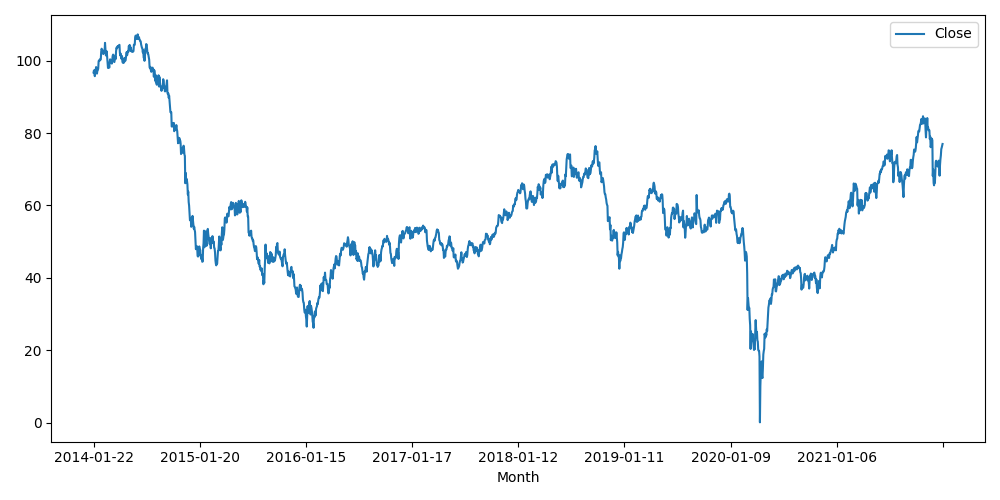

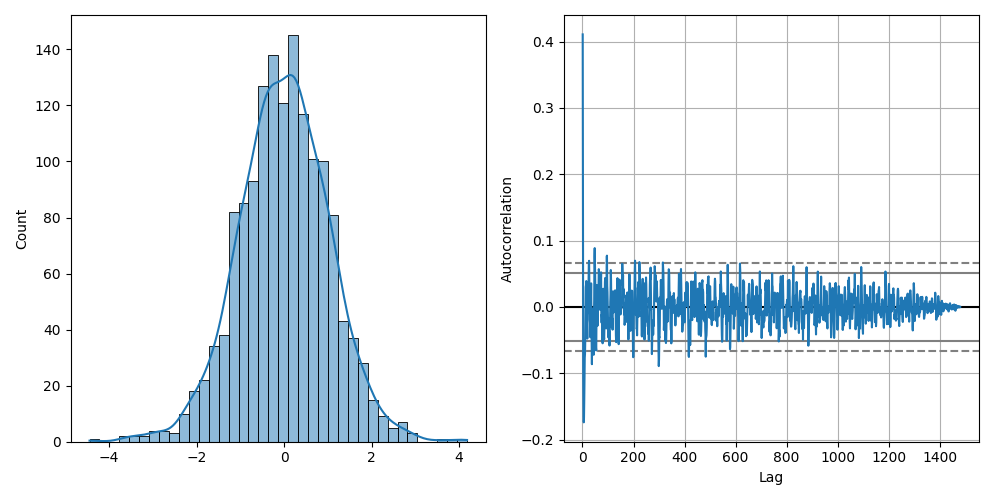

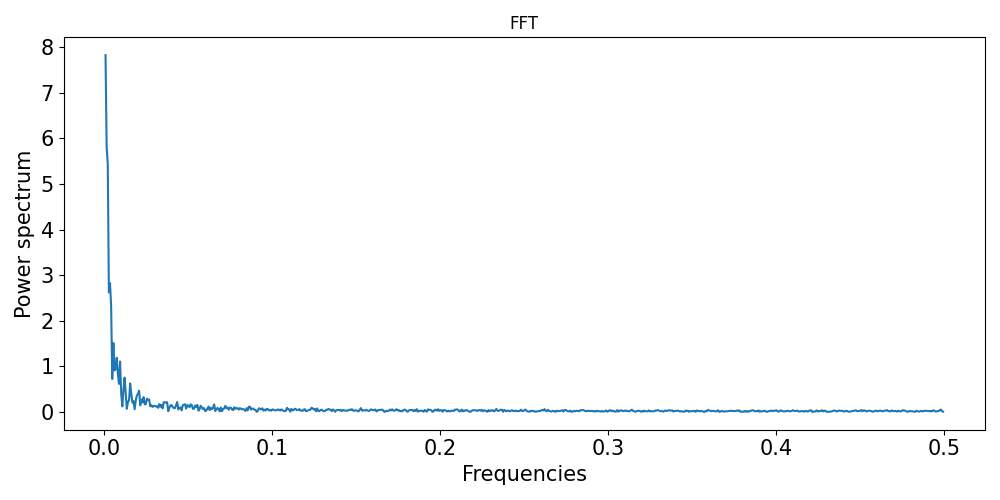

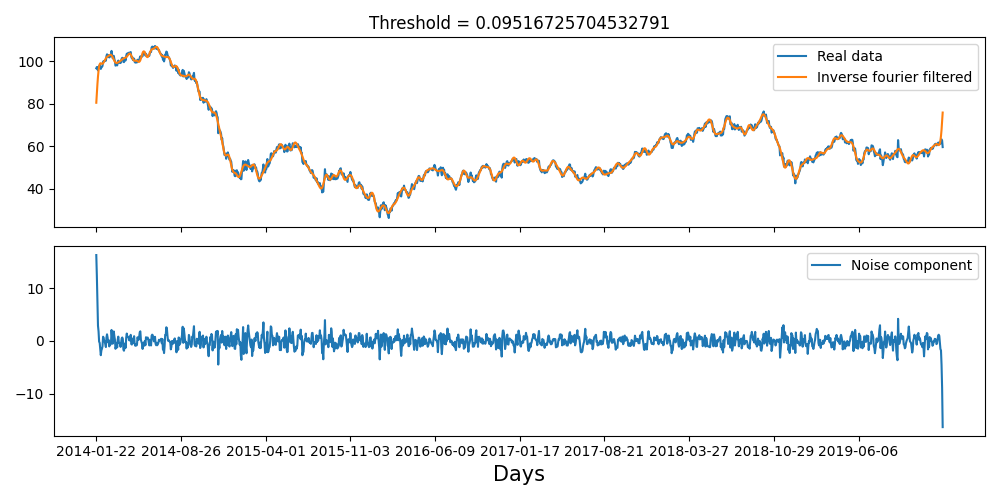

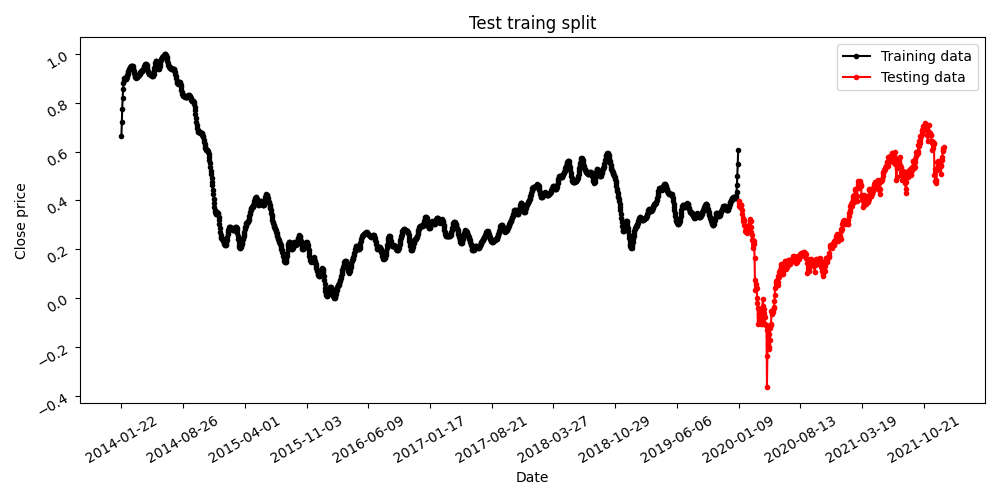

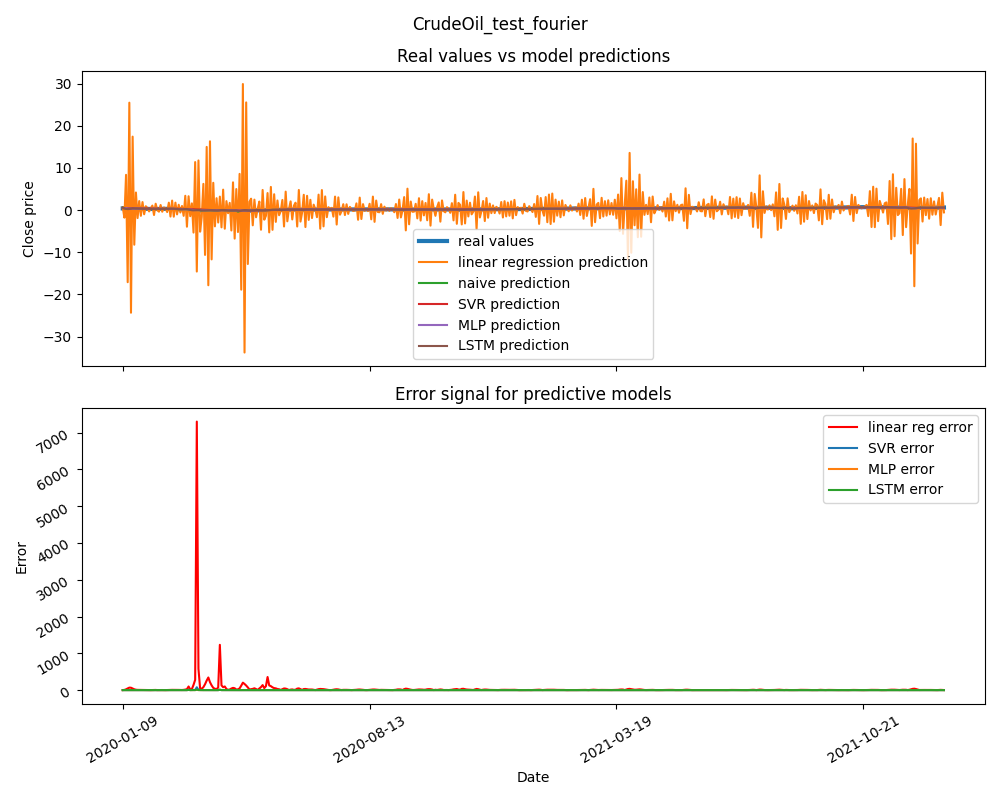

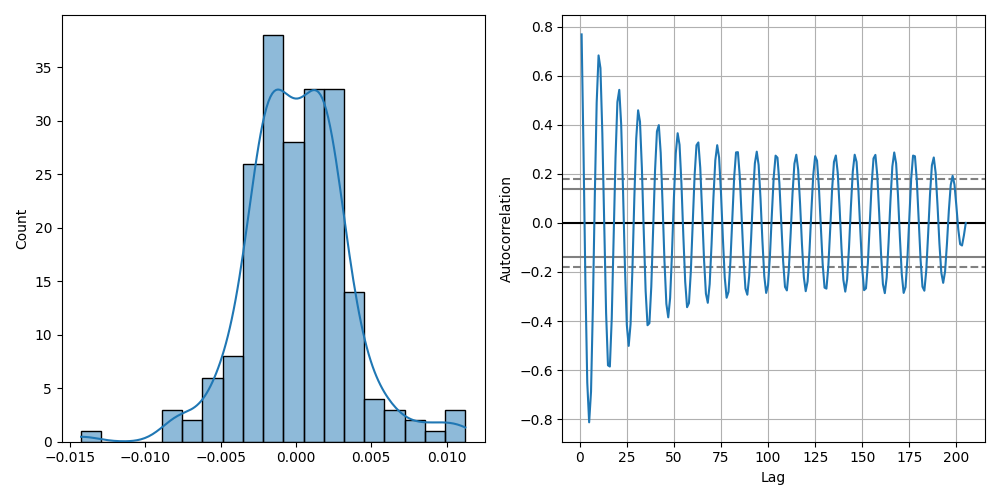

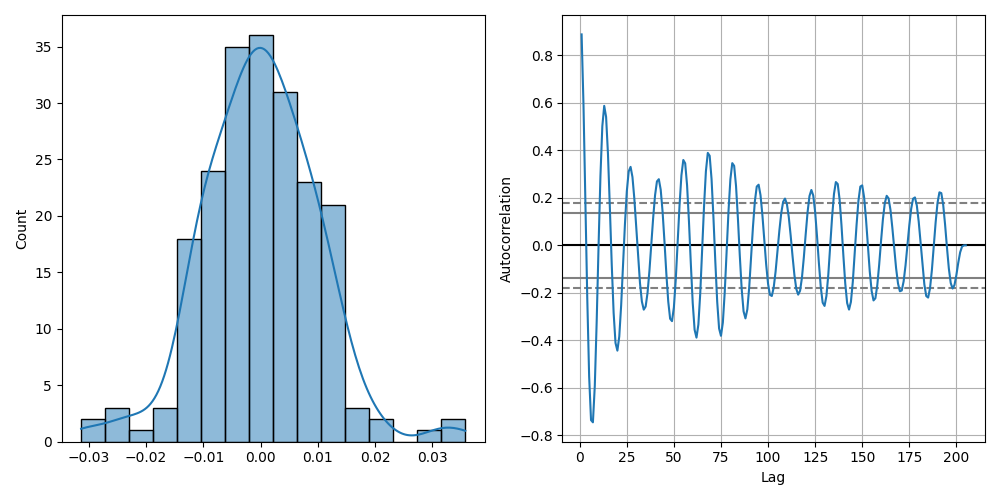

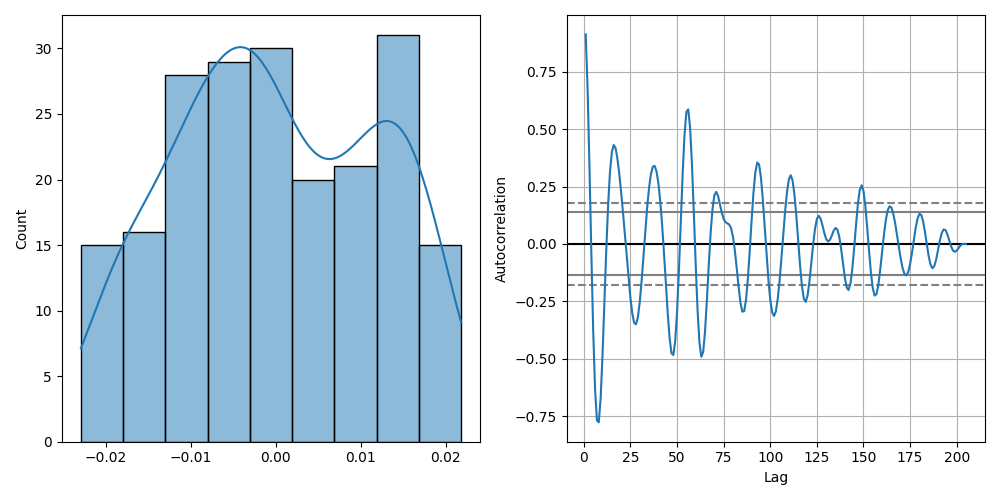

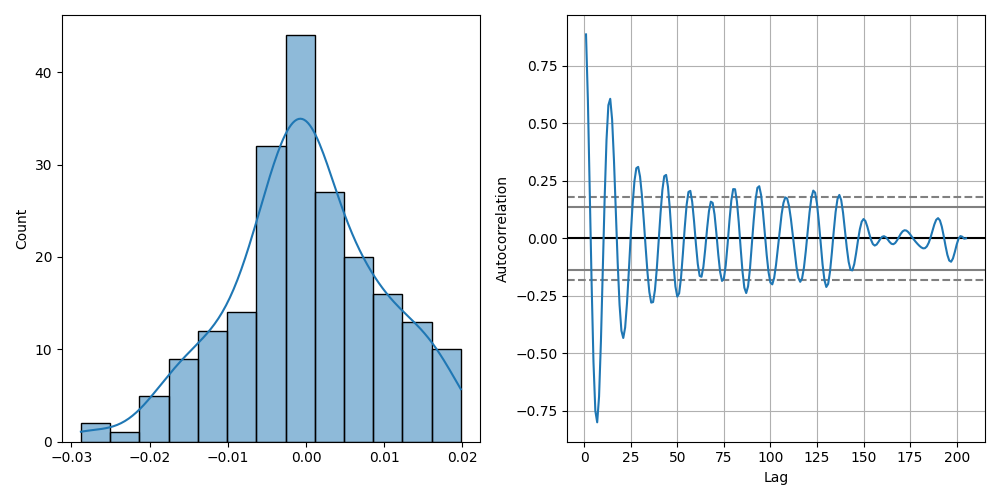

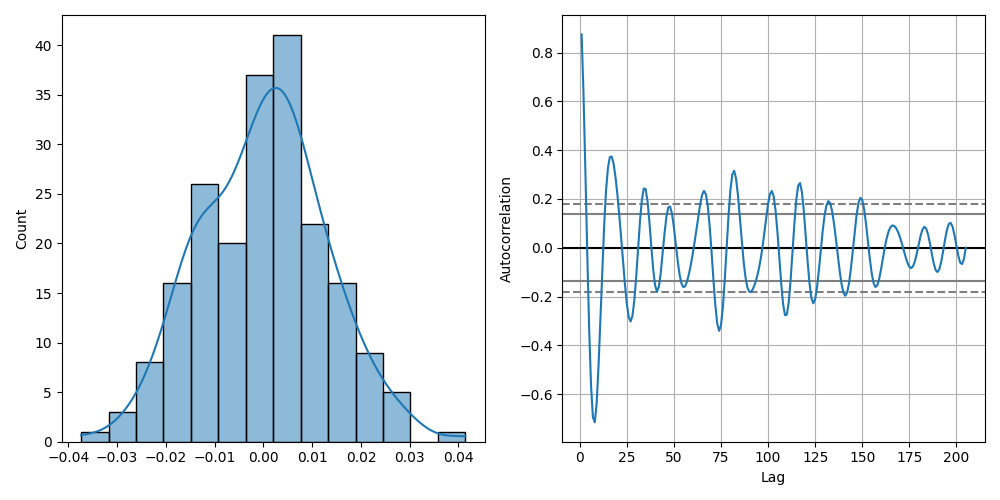

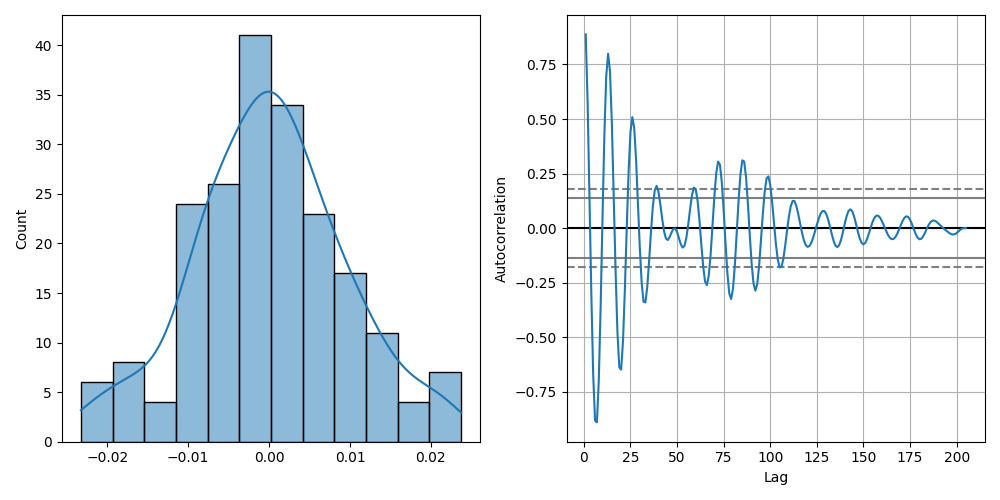

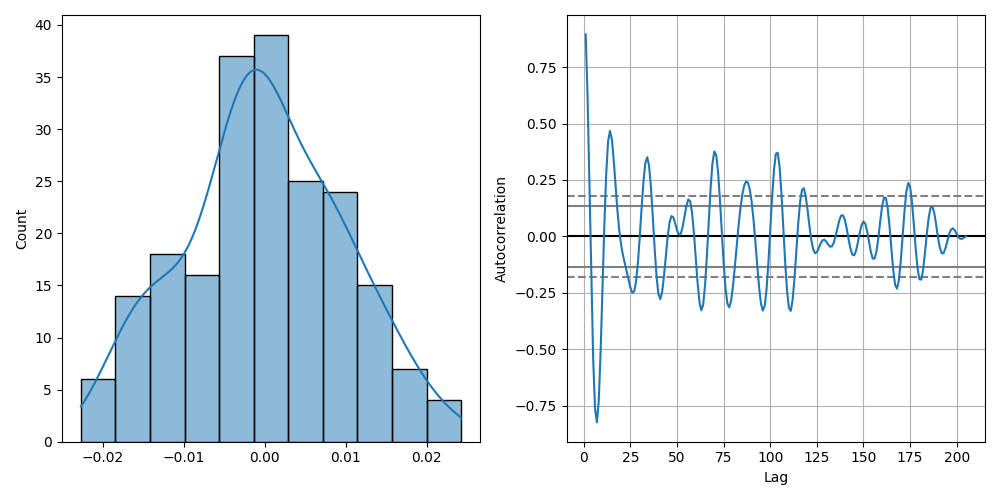

In [7]:
financial_assets = ['CrudeOil']#,'S&P500','Apple','EurUsd'] # AirPassengers',
feat_engineering = 'test_fourier'
column_to_predict = 'Close' #'#Passengers' 

for financial_asset in financial_assets:
    ###################################################################################################
    # import some data
    ###################################################################################################

    df = pd.read_csv(f'./test_data/{financial_asset}_yfinance.csv') # sp_500 = GSPC.csv, # airplaine = AirPassengers.csv
    df = df.iloc[-2000:,:].reset_index(drop=True) # only look at last 2000 days
    # df['Date'] = df['Month']
    df.plot(x='Date',y=f'{column_to_predict}',figsize=(10,5),legend=True,xlabel='Month',subplots=True)
    plt.tight_layout()
    display(df)

    # some forecasting parameters
    window_length = 10
    split = 500 # 44 for AirPlane

    ###################################################################################################
    # feature engineering
    ###################################################################################################

    # fft the testing data
    signal = np.array(df[f'{column_to_predict}'][-2000:-split]) # data
    denoised_signal = automatic_fourier_denoising(signal,df, split)

    ###################################################################################################
    # single out of sample validation results
    ###################################################################################################

    # input data
    scaler = MinMaxScaler()
    scaled_training_data = scaler.fit_transform(denoised_signal.reshape(-1, 1)).flatten()
    scaled_test_data = scaler.transform(df[f'{column_to_predict}'][-split:].to_numpy().reshape(-1,1)).flatten()
    scaled_input_data = np.append(scaled_training_data,scaled_test_data)

    # initialize class object
    blah = time_series_prediction(financial_asset,feat_engineering,df['Date'],scaled_input_data,window_length,1)#time_series_prediction(sp_500['Date'][-4000:],sp_500['Volume'][-4000:]/1e9,5,1) # pass: ime series dates, univariate time series, lag window length, a number of steps ahead to predict
    blah.sliding_window_1(verbose=0) # time series to supervised ML problem
    blah.train_test_split(split=split) # testing and training dataset split
    blah.test_train_plot(ylabel='Close price')    # visualize training split

    # perform some prediction tasks
    blah.linear_regression()
    blah.support_vector_machine(model_tunning=False,C= 0.1, kernel= 'linear',epsilon=0.1)
    blah.neural_net_mlp(model_tunning=False,
                        activation= 'relu', 
                        hidden_layer_sizes= (100, 100, 100), 
                        learning_rate= 'invscaling', 
                        learning_rate_init= 0.001,
                        solver='adam')
    blah.lstm(model_tunning=False,n_batch=64)
    blah.naive_model()

    # tabulate results nicely
    blah.collect_results()

    # visualize results
    blah.vis_results_time_series(ylabel='Close price',second_plot='error')

    # view final results
    blah.conclusion()


    ###################################################################################################
    # walk forward validation results
    ###################################################################################################
    mapping = {'LinearReg':blah.linear_regression_model,
                'svr':blah.svr_model,
                'MLP':blah.mlp_model,
                'LSTM':blah.lstm_model}

    # store evaulation results for different models
    model_results = []
    model_pred_results = {'Original Values':None,
                'LinearReg':None,
                'svr':None,
                'MLP':None,
                'LSTM':None,
                }

    # apply walkforward for all models
    for model_name in mapping.keys():

        # retrieve model
        model = mapping[model_name]

        # apply walk forward and save results
        train_len = 225 # 48 for Airplane
        test_len = 25   # 12 for Airplane
        df_walk_forward, df_hit_rate, mse,mae,mape,accuracy = blah.walk_forward_val(model_name,model,
                                                                                    train_len=train_len,
                                                                                    test_len=test_len,
                                                                                    train_frequency=10,
                                                                                    transformer=automatic_fourier_denoising_wf,
                                                                                    only_training=True)
        # wrangle results
        
        # plots
        df_walk_forward['error'] = abs((df_walk_forward['real_value'] - df_walk_forward['prediction']))# / df_walk_forward['real_value'])
        
        fig, ax = plt.subplots(2,1, figsize=(10,8),sharex=True)
        ax[0].plot(df_walk_forward['date'],df_walk_forward['real_value'])
        ax[0].set_ylabel('Close')

        ax[1].plot(df_walk_forward['date'],df_walk_forward['error'],color='tab:orange')
        ax[1].set_title('Walk forward error through time')
        ax[1].set_xlabel('Dates')
        ax[1].legend()

        max = df_walk_forward.shape[0]
        ax[1].set_xticks([df_walk_forward['date'].iloc[x] for x in range(0,max,150)])
        ax[1].tick_params(rotation=30)
        ax[1].set_ylabel('Error')
        ax[1].set_xlabel('Date')
        plt.tight_layout()
        plt.savefig(f'./results/univariate_single_step_ahead/{feat_engineering}/{financial_asset}_{model_name}_wf.png',facecolor='w')
        plt.close()

        # tables 
        model_results.append({'model':model_name,'mse':mse,'mae':mae,'mape':mape,'accuracy':accuracy})

        # save prediction so we can view inverted walk forward results too
        model_pred_results['Original Values'] = df_walk_forward['real_value'].to_numpy()
        model_pred_results[model_name] = df_walk_forward['prediction'].to_numpy()
        
    # place wf results into df, save to csv and latex table
    df_conclusion_wf = pd.DataFrame.from_records(model_results)
    df_conclusion_wf.to_csv(f'./results/univariate_single_step_ahead/{feat_engineering}/{financial_asset}_results_summary_wf.csv')    
    
    latex_table = tabulate(df_conclusion_wf, headers='keys', tablefmt="latex_longtable")
    with open(f'./results/univariate_single_step_ahead/{feat_engineering}/{financial_asset}_latex_table_wf.txt',"w") as my_latex_table:
        my_latex_table.write(latex_table)

    # plot wf prediction results through time
    for model in model_pred_results.keys():
        model_pred_results[model] = model_pred_results[model].astype(float)

    model_pred_results['Date'] = df['Date'].iloc[train_len:]
    df_wf_results = pd.DataFrame.from_dict(model_pred_results)
    ax = df_wf_results.plot(figsize=(10,4), x='Date',fontsize=15)
    ax.set_ylabel(ylabel=f'{column_to_predict}',fontsize=15)
    ax.set_xlabel(xlabel='Date',fontsize=15)
    ax.tick_params(labelsize=12,rotation=30)

    plt.tight_layout()
    plt.savefig(f'./results/univariate_single_step_ahead/{feat_engineering}/{financial_asset}_wf_results.png')

